In [1]:
from empath import Empath
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from function_library import *
from function_library2 import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA


DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
# load CRA meeting minutes data
df = pd.read_csv('/Users/joey/Downloads/CRA_Meeting_Minutes_Coded_2020421.csv')
date = pd.to_datetime(df['DATE'])
df['date'] = date


In [3]:
unique_date = pd.Series(df['date'].unique())
money_sums = df.groupby(['date'])['MONEY'].sum()

# number of money related decisions
m_decision_sums = df.groupby(['date'])['MONEY'].count() 
# number of all decisions
all_decision_sums = df.groupby(['date'])['PARTICIPANTS'].count() 


In [4]:
# find money amount and 
money_amounts = np.zeros((6,12))
decision_amounts = np.zeros((6,12))
for i in range(len(money_sums)):
    unique_date.dt.year[i]
    i_x = unique_date.dt.year[i]-2012
    i_y = unique_date.dt.month[i]-1
    money_amounts[i_x,i_y] = money_sums[i]
    decision_amounts[i_x,i_y] = m_decision_sums[i]

In [5]:
# load email data
year_list = fromPickle('year_list')
month_list = fromPickle('month_list')
empath_normed=np.loadtxt('empath_normed.txt')

email_by_month=np.zeros((6,12))
for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = month_list[i]-1
    email_by_month[year_idx, month_idx] += empath_normed[i, 3]

In [6]:
# normalize 
# not necessary if plot in different scale

money_amounts = money_amounts.reshape(-1)
# money_amounts = money_amounts/money_amounts.max()
decision_amounts = decision_amounts.reshape(-1)
# dicision_amounts = dicision_amounts/dicision_amounts.max()
email_by_month = email_by_month.reshape(-1)
# email_by_month = email_by_month/email_by_month.max()


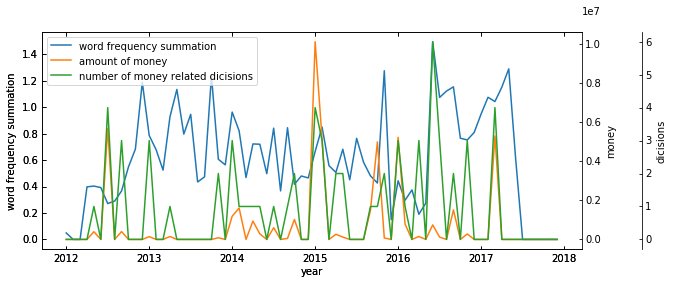

In [8]:
# plotting
plt.figure(figsize=(12,4))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(offset, 0))
par1.axis["right"].toggle(all=True)

host.set_xlabel("year")
host.set_ylabel("word frequency summation")
par1.set_ylabel("money")
par2.set_ylabel("dicisions")

p1, = host.plot(email_by_month, label = 'word frequency summation')
p2, = par1.plot(money_amounts, label = 'amount of money')
p3, = par2.plot(decision_amounts, label = 'number of money related decisions')

host.set_xticks(np.linspace(0,12*6,7))
host.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
host.legend()
plt.draw()
plt.show()